In [12]:
!pip install torch torchvision

In [1]:
import matplotlib.pyplot as plt

from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

# training 데이터 & test 데이터
training_data = MNIST(root="./", train =True, download=True, transform=ToTensor())
test_data = MNIST(root="./", train =False, download=True, transform=ToTensor())

print(len(training_data))
print(len(test_data))

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:02<00:00, 4.94MB/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 131kB/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.06MB/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.84MB/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw

60000
10000


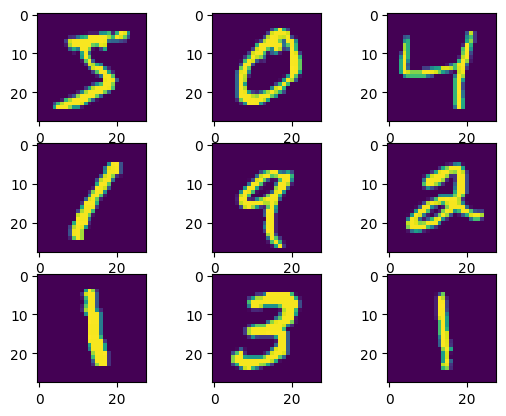

In [2]:
for i in range(9):
  plt.subplot(3,3, i+1)
  plt.imshow(training_data.data[i])
plt.show()

In [3]:
from torch.utils.data.dataloader import DataLoader

train_loader = DataLoader(training_data, batch_size=32, shuffle=True)

# 평가용 데이터셋 섞을 필요 X
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [12]:
import torch
import torch.nn as nn
from torch.optim.adam import Adam

device = "cuda" if torch.cuda.is_available() else "cpu"

## nn.Linear(input, output)
model = nn.Sequential(
    nn.Linear(784,64),
    nn.ReLU(),
    nn.Linear(64,64),
    nn.ReLU(),
    nn.Linear(64,10)
).to(device)

lr = 1e-3
optim = Adam(model.parameters(), lr=lr)
for epoch in range(20):
  for data, label in train_loader:
    optim.zero_grad()

    data = torch.reshape(data,(-1,784)).to(device)
    preds = model(data)

    loss = nn.CrossEntropyLoss()(preds, label.to(device))
    loss.backward()
    optim.step()


  print(f"epoch : {epoch+1}, loss : {loss.item()}")



  torch.save(model.state_dict(), "MNIST.pth")

epoch : 1, loss : 0.09386058896780014
epoch : 2, loss : 0.589506983757019
epoch : 3, loss : 0.026424221694469452
epoch : 4, loss : 0.040864940732717514
epoch : 5, loss : 0.058909181505441666
epoch : 6, loss : 0.037049561738967896
epoch : 7, loss : 0.011878532357513905
epoch : 8, loss : 0.0050268759950995445
epoch : 9, loss : 0.020055031403899193
epoch : 10, loss : 0.006416955962777138
epoch : 11, loss : 0.004151531029492617
epoch : 12, loss : 0.02584085613489151
epoch : 13, loss : 0.0014364479575306177
epoch : 14, loss : 0.00015717727364972234
epoch : 15, loss : 0.00023427327687386423
epoch : 16, loss : 0.0889061838388443
epoch : 17, loss : 0.0001354169799014926
epoch : 18, loss : 0.010549230501055717
epoch : 19, loss : 0.0017989518819376826
epoch : 20, loss : 0.0012920909794047475


In [14]:
model.load_state_dict(torch.load("MNIST.pth", map_location=device))

num_corr = 0

with torch.no_grad():
  for data, label in test_loader:
    data = torch.reshape(data, (-1,784)).to(device)

    output = model(data.to(device))
    preds = output.data.max(1)[1]

    corr = preds.eq(label.to(device)).sum().item()
    num_corr += corr

print(f"accuracy : {num_corr/len(test_data)}")



<ipython-input-14-43bb83edbf3c>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("MNIST.pth", map_location=device))


accuracy : 0.9738
